In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from alibi.explainers import PartialDependence, plot_pd

C:\Users\user\anaconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\user\anaconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, 

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4


In [3]:
df.to_csv('bike.csv', header=True, index=False)

In [4]:
df=pd.read_csv('bike.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           731 non-null    object 
 1   yr               731 non-null    int64  
 2   mnth             731 non-null    object 
 3   holiday          731 non-null    object 
 4   weekday          731 non-null    object 
 5   workingday       731 non-null    object 
 6   weathersit       731 non-null    object 
 7   temp             731 non-null    float64
 8   hum              731 non-null    float64
 9   windspeed        731 non-null    float64
 10  cnt              731 non-null    int64  
 11  days_since_2011  731 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 68.7+ KB


In [6]:
feature_names = df.columns.tolist()
feature_names.remove('cnt')
# define target names
target_names = ['Number of bikes']
# define categorical columns
categorical_columns_names = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
# define categorical and numerical indices for later preprocessing
categorical_columns_indices = [feature_names.index(cn) for cn in categorical_columns_names]
numerical_columns_indices = [feature_names.index(fn) for fn in feature_names if fn not in categorical_columns_names]
# extract data
X = df[feature_names]
y = df['cnt']
# split data in train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(categorical_columns_indices)#alibi의 explain내의 features option은 int로 지정해야 하기 때문
print(numerical_columns_indices) #그리고 pd나 pv에서 지정하는 categorical_names는 dictionary{index:list of categorical values}의 index

[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9, 10]


In [7]:
# define and fit the oridnal encoder
oe = OrdinalEncoder().fit(X_train[categorical_columns_names])
print(oe.categories_)
# transform the categorical columns to ordinal encoding
X_train.loc[:, categorical_columns_names] = oe.transform(X_train[categorical_columns_names])
X_test.loc[:, categorical_columns_names] = oe.transform(X_test[categorical_columns_names])
print(X_train[:5])
# convert data to numpy
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()
# define categorical mappings
categorical_names = {i: list(v) for (i, v) in zip(categorical_columns_indices, oe.categories_)}
print('-------------------------')
print(categorical_names)

[array(['FALL', 'SPRING', 'SUMMER', 'WINTER'], dtype=object), array([2011, 2012], dtype=int64), array(['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY',
       'NOV', 'OCT', 'SEP'], dtype=object), array(['HOLIDAY', 'NO HOLIDAY'], dtype=object), array(['FRI', 'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'], dtype=object), array(['NO WORKING DAY', 'WORKING DAY'], dtype=object), array(['GOOD', 'MISTY', 'RAIN/SNOW/STORM'], dtype=object)]
     season   yr  mnth  holiday  weekday  workingday  weathersit       temp  \
97      1.0  0.0   0.0      1.0      0.0         1.0         1.0   7.784151   
503     1.0  1.0   8.0      1.0      0.0         1.0         0.0  18.515849   
642     0.0  1.0  10.0      1.0      4.0         1.0         1.0  22.902500   
498     1.0  1.0   8.0      1.0      3.0         0.0         0.0  20.787500   
303     0.0  0.0  10.0      1.0      1.0         1.0         0.0   7.980000   

         hum  windspeed  days_since_2011  
97   83.6250  15.208464              

In [8]:
preprocessor = ColumnTransformer([("num", StandardScaler(), numerical_columns_indices), 
                                  ("cat", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   categorical_columns_indices)])

In [9]:
 # fit preprocessor
preprocessor.fit(X_train)
# preprocess train and test datasets
X_train_ohe = preprocessor.transform(X_train)
X_test_ohe = preprocessor.transform(X_test)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [10]:
# define and fit regressor - feel free to play with the hyperparameters
predictor = RandomForestRegressor(random_state=0)
predictor.fit(X_train_ohe, y_train)
# compute scores
print('Train score: %.2f' % (predictor.score(X_train_ohe, y_train)))
print('Test score: %.2f' % (predictor.score(X_test_ohe, y_test)))

Train score: 0.98
Test score: 0.90


In [11]:
prediction_fn = lambda x: predictor.predict(preprocessor.transform(x))

In [12]:
# define explainer
explainer = PartialDependence(predictor=prediction_fn,
feature_names=feature_names,
target_names=target_names,
categorical_names=categorical_names)

Select a few features of interest, such as temperature, humidity, wind speed, and season

In [13]:
 # select temperature, humidity, wind speed, and season
features = [feature_names.index('temp'),feature_names.index('hum'),
            feature_names.index('windspeed'), feature_names.index('season')]
print(features)

[7, 8, 9, 0]


In [14]:
# compute explanations
exp = explainer.explain(X=X_train,features=features,kind='average')

array([[<Axes: xlabel='temp', ylabel='Number of bikes'>,
        <Axes: xlabel='hum', ylabel='Number of bikes'>,
        <Axes: xlabel='windspeed', ylabel='Number of bikes'>],
       [<Axes: xlabel='season', ylabel='Number of bikes'>, None, None]],
      dtype=object)

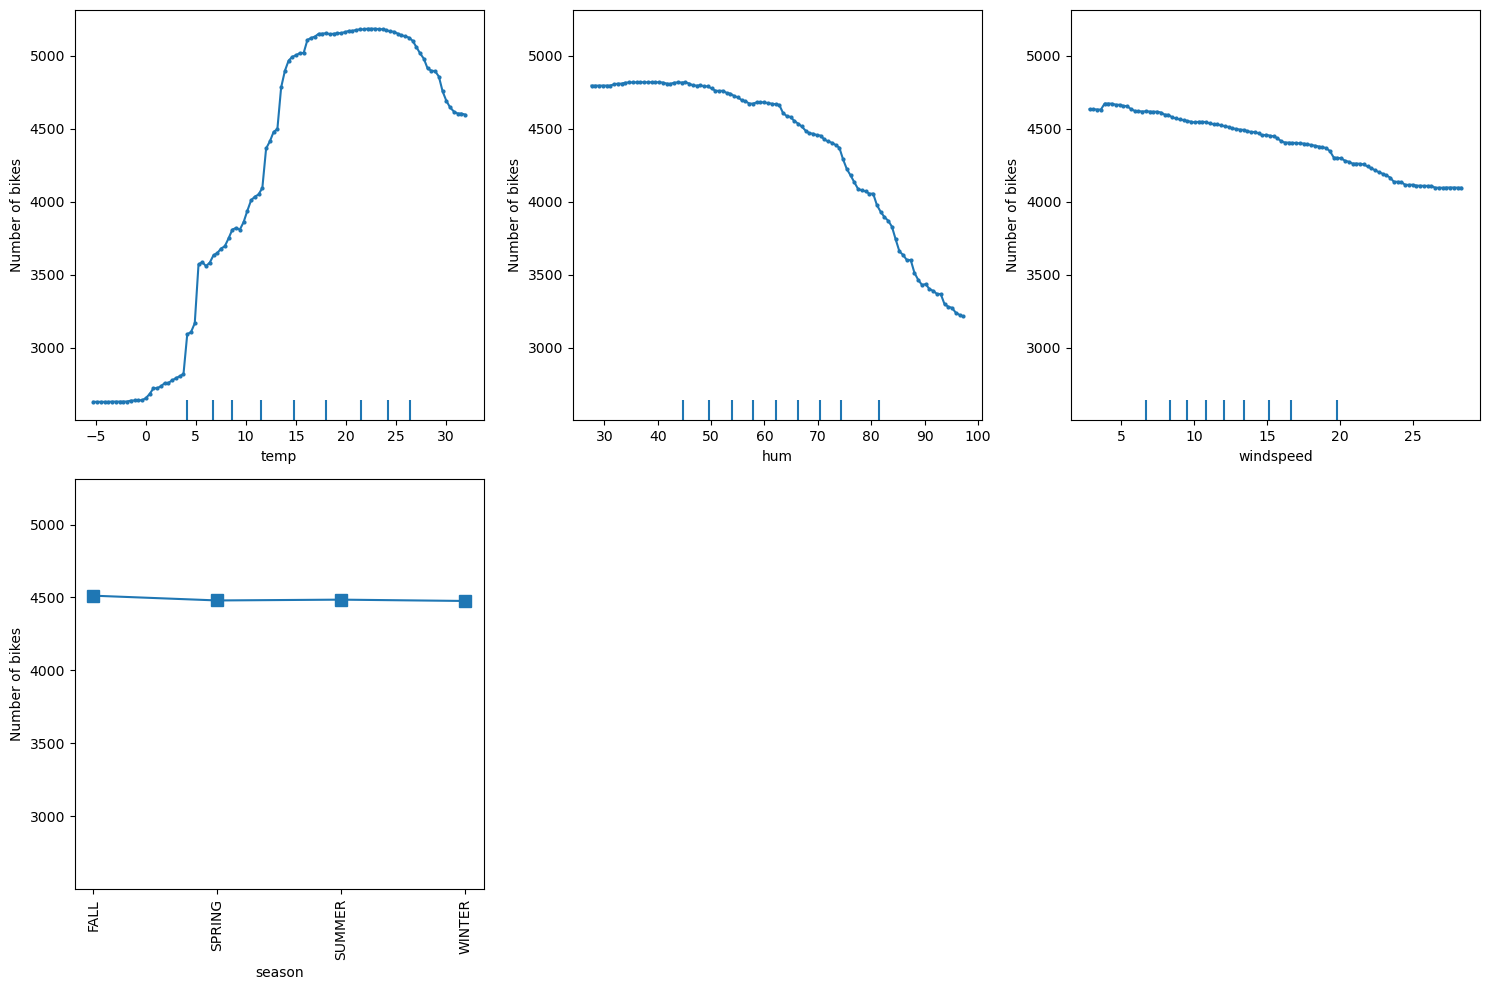

In [15]:
# plot partial dependece curves
#np.object=object
plot_pd(exp=exp,fig_kw={'figheight': 10, 'figwidth': 15})

In [16]:
 # compute explanations
exp = explainer.explain(X=X_train,
features=features,
kind='both')

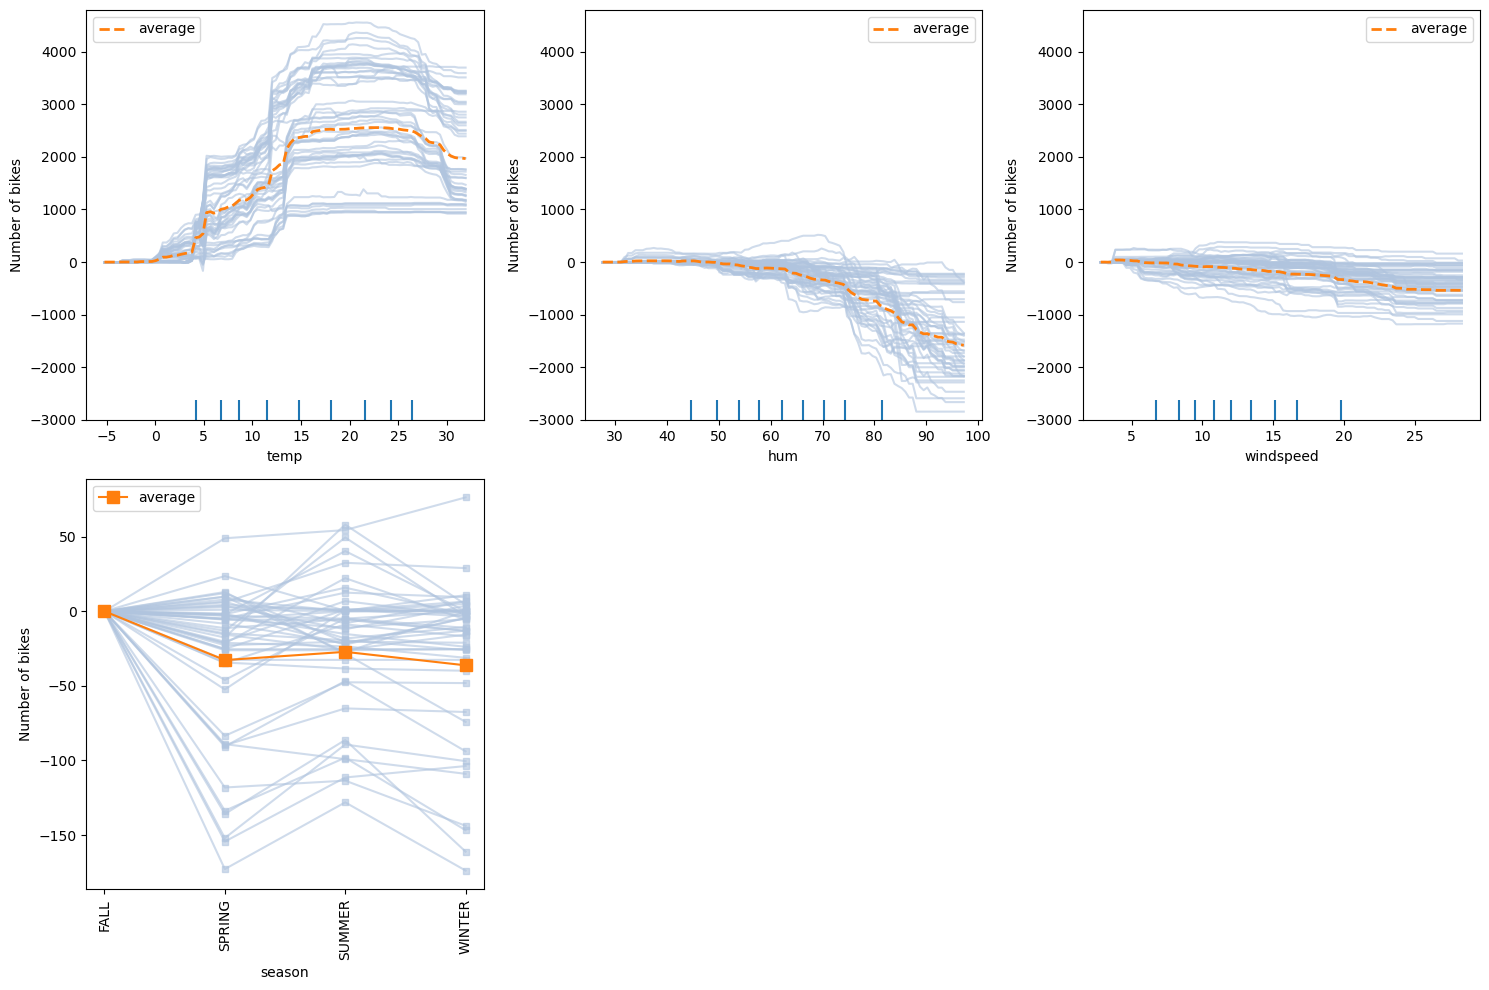

In [17]:
# random seed for `ice` sampling
np.random.seed(13)
# plot the pd and ice
plot_pd(exp=exp,
n_cols=3,
n_ice=50, # number of ICE curves to be displayed. Can be set to 'all' or provided a list of indices
sharey='row',
center=True, # center the plots for better visualization
fig_kw={'figheight': 10, 'figwidth': 15});

In [17]:
feature_interaction = [
(feature_names.index('temp'), feature_names.index('windspeed')),
(feature_names.index('mnth'), feature_names.index('weathersit')),
(feature_names.index('season'), feature_names.index('temp'))
]

In [18]:
 # compute explanations
exp = explainer.explain(X=X_train,
features=feature_interaction,
kind='average',
grid_resolution=25)

array([[<AxesSubplot: xlabel='temp', ylabel='windspeed'>,
        <AxesSubplot: xlabel='weathersit', ylabel='mnth'>],
       [<AxesSubplot: xlabel='temp', ylabel='Number of bikes'>, None]],
      dtype=object)

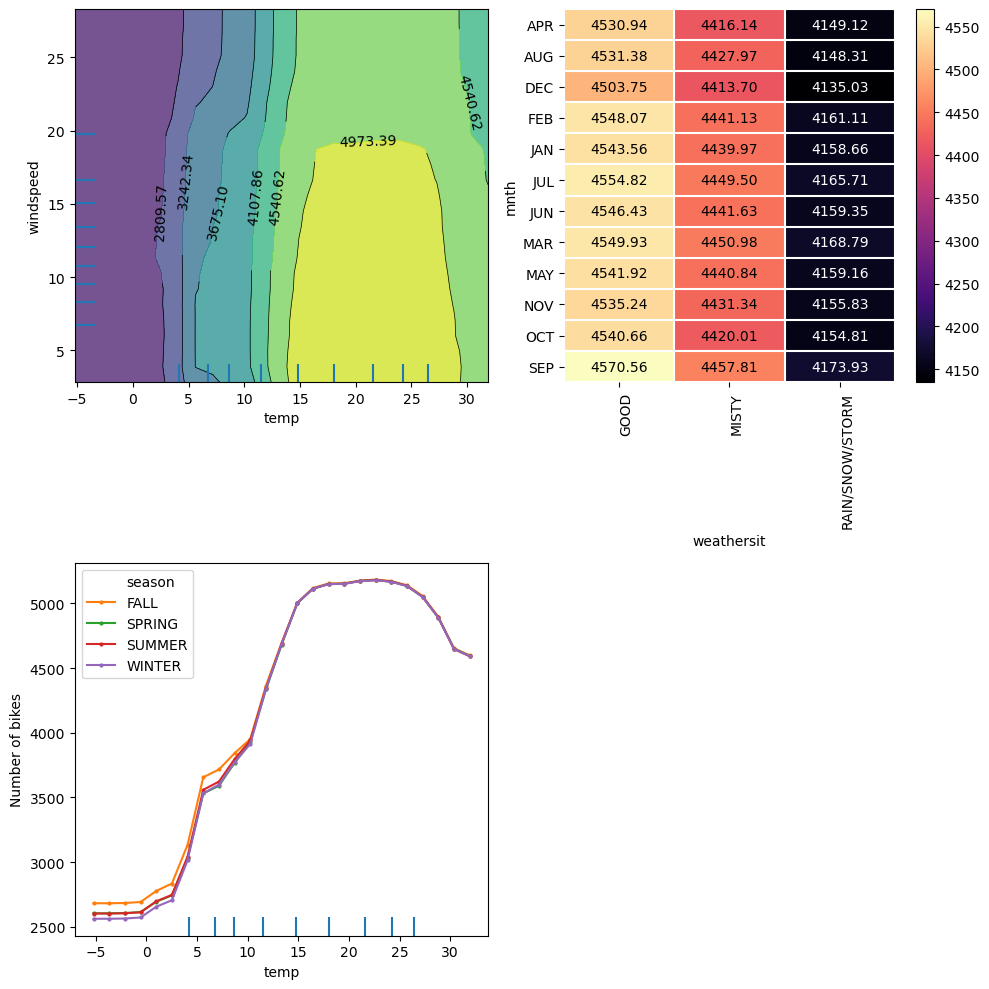

In [19]:
# plot partial dependece curves
plot_pd(exp=exp,n_cols=2,fig_kw={'figheight': 10, 'figwidth': 10})

In [20]:
from alibi.explainers import PartialDependenceVariance
pd_variance = PartialDependenceVariance(predictor=prediction_fn,
feature_names=feature_names,
categorical_names=categorical_names,
target_names=target_names)

In [21]:
exp_importance_all = pd_variance.explain(X=X_train, method='importance')

array([[<AxesSubplot: title={'center': 'Number of bikes'}, xlabel='Feature importance'>]],
      dtype=object)

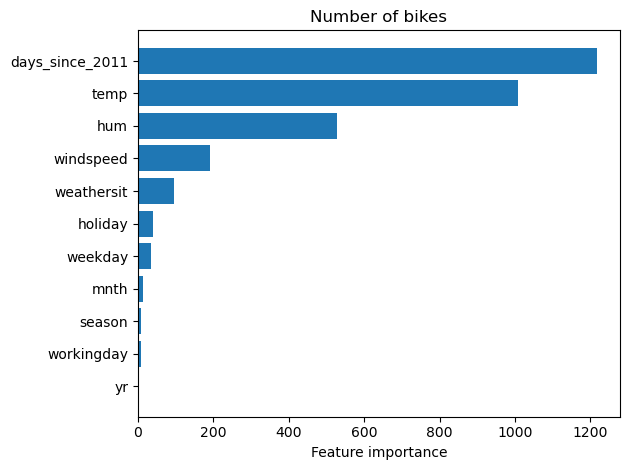

In [22]:
from alibi.explainers import plot_pd_variance
plot_pd_variance(exp=exp_importance_all)

In [23]:
exp_importance = pd_variance.explain(X=X_train, features=features, method='importance')

array([[<AxesSubplot: title={'center': 'Number of bikes'}, xlabel='Feature importance'>]],
      dtype=object)

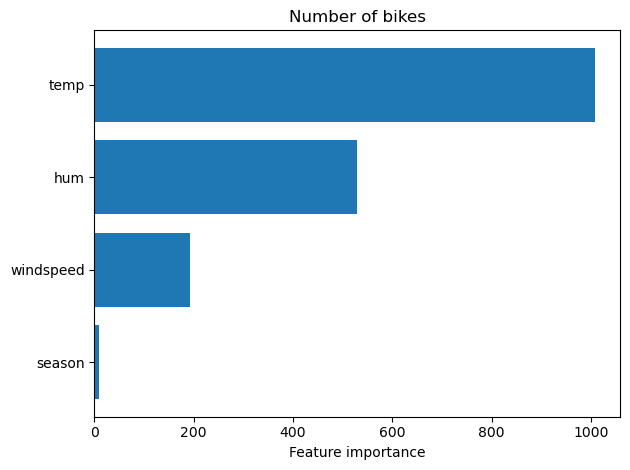

In [24]:
from alibi.explainers import plot_pd_variance
plot_pd_variance(exp=exp_importance)

array([[<AxesSubplot: title={'center': 'imp(temp) = 1008.212'}, xlabel='temp', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'imp(hum) = 528.321'}, xlabel='hum', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'imp(windspeed) = 192.379'}, xlabel='windspeed', ylabel='Number of bikes'>],
       [<AxesSubplot: title={'center': 'imp(season) = 9.055'}, xlabel='season', ylabel='Number of bikes'>,
        None, None]], dtype=object)

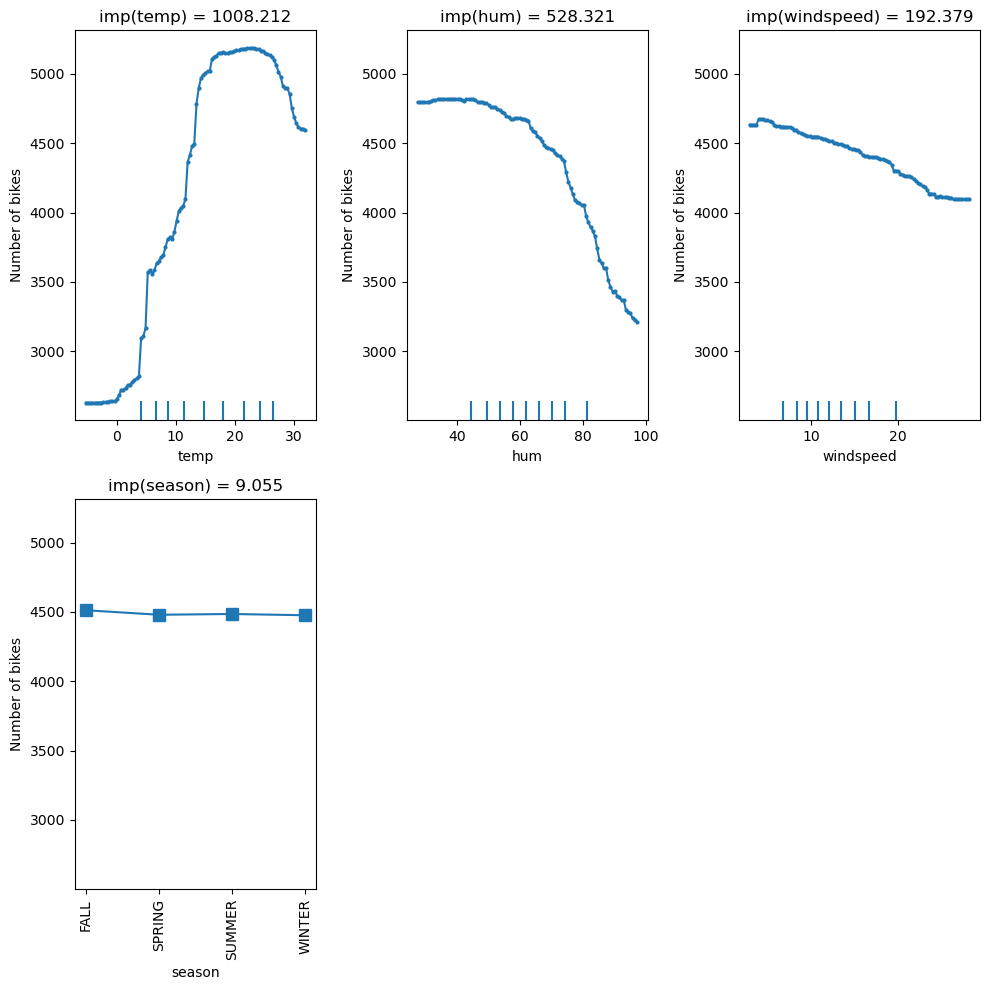

In [25]:
plot_pd_variance(exp=exp_importance, summarise=False,fig_kw={'figheight': 10, 'figwidth': 10})

array([[<AxesSubplot: title={'center': 'Number of bikes'}, xlabel='Feature interaction'>]],
      dtype=object)

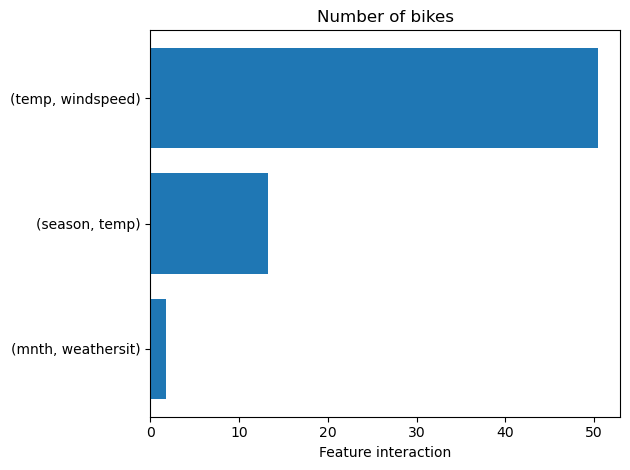

In [28]:
exp_interaction = pd_variance.explain(X_train, features=feature_interaction, method='interaction')
plot_pd_variance(exp=exp_interaction)

array([[<AxesSubplot: title={'center': 'inter(temp,windspeed) = 50.406'}, xlabel='temp', ylabel='windspeed'>,
        <AxesSubplot: title={'center': 'inter(windspeed|temp) = 50.859'}, xlabel='temp', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'inter(temp|windspeed) = 49.952'}, xlabel='windspeed', ylabel='Number of bikes'>],
       [<AxesSubplot: title={'center': 'inter(season,temp) = 13.243'}, xlabel='temp', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'inter(temp|season) = 12.914'}, xlabel='season', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'inter(season|temp) = 13.572'}, xlabel='temp', ylabel='Number of bikes'>],
       [<AxesSubplot: title={'center': 'inter(mnth,weathersit) = 1.744'}, xlabel='weathersit', ylabel='mnth'>,
        <AxesSubplot: title={'center': 'inter(weathersit|mnth) = 1.744'}, xlabel='mnth', ylabel='Number of bikes'>,
        <AxesSubplot: title={'center': 'inter(mnth|weathersit) = 1.744'}, xlabel='w

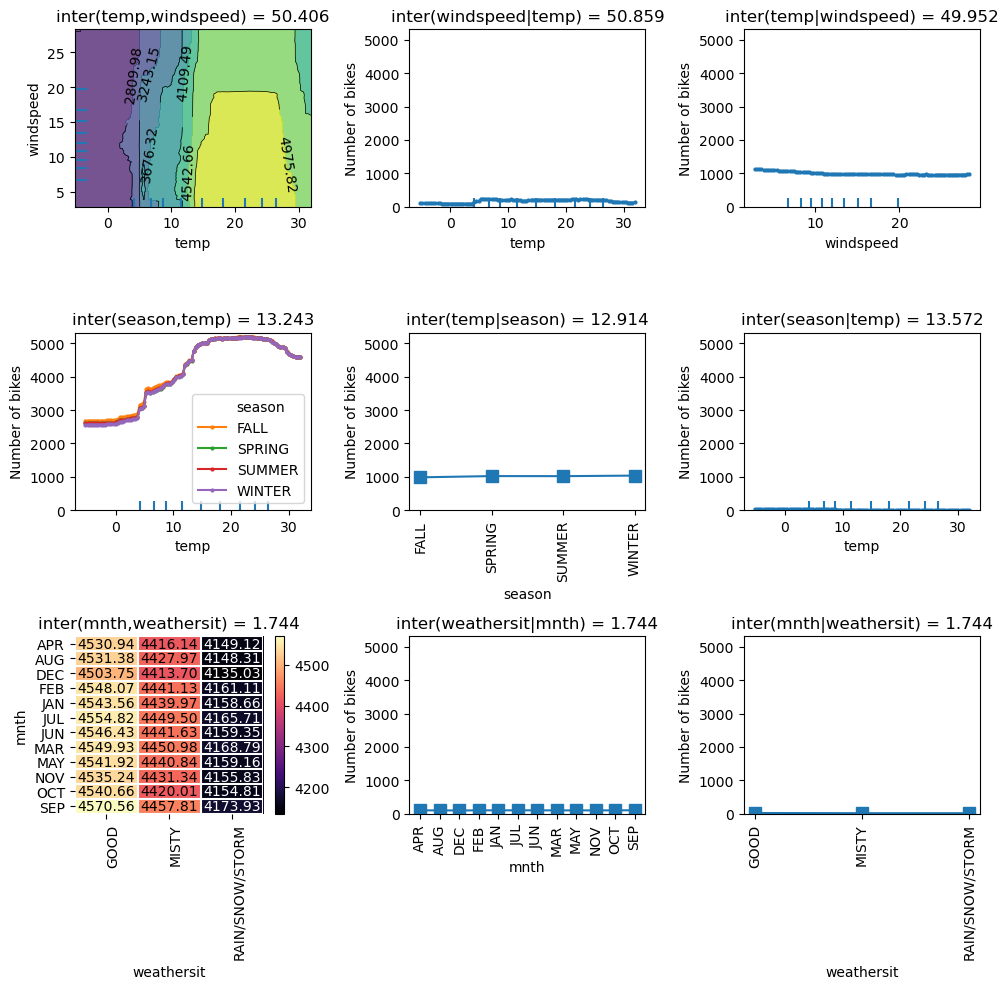

In [39]:
plot_pd_variance(exp=exp_interaction,summarise=False,fig_kw={'figheight': 10, 'figwidth': 10})